# Caso práctico

En el archivo “mammals.csv” se encuentra una lista de mamíferos y los constituyentes de su leche. A partir de esta información, segmenta los mamíferos sobre la base de los constituyentes de la leche y obtén los valores promedios de la leche para cada grupo de animales.

## 1. Importar librerías

In [59]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## 2. Importar datos - Abrir archivo

In [60]:
animales = pd.read_csv('mammals.csv', sep = ',')

## 3. Entender los datos

In [61]:
animales.head()

,name,water,protein,fat,lactose,ash
0,Horse,90.1,2.6,1.0,6.9,0.35
1,Orangutan,88.5,1.4,3.5,6.0,0.24
2,Monkey,88.4,2.2,2.7,6.4,0.18
3,Donkey,90.3,1.7,1.4,6.2,0.40
4,Hippo,90.4,0.6,4.5,4.4,0.10


In [62]:
animales.describe()

,water,protein,fat,lactose,ash
count,25.000000,25.000000,25.000000,25.00000,25.000000
mean,78.184000,6.212000,10.308000,4.13200,0.829200
std,12.817913,3.652547,10.517997,1.83183,0.473787
min,44.900000,0.600000,1.000000,0.00000,0.100000
25%,71.300000,3.000000,3.400000,2.70000,0.530000
50%,82.000000,5.900000,6.300000,4.70000,0.800000
75%,87.700000,9.700000,13.100000,5.60000,0.930000
max,90.400000,12.300000,42.000000,6.90000,2.300000


In [63]:
animales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
name       25 non-null object
water      25 non-null float64
protein    25 non-null float64
fat        25 non-null float64
lactose    25 non-null float64
ash        25 non-null float64
dtypes: float64(5), object(1)
memory usage: 1.2+ KB


In [64]:
pd.isnull(animales).sum()

name       0
water      0
protein    0
fat        0
lactose    0
ash        0
dtype: int64

## 4. Limpiado de datos

Solo vamos a utilizar las columnas que son numéricas

In [65]:

col_names = list(animales.columns)
col_names.remove('name')

animales_data = animales[col_names]

In [66]:
animales.head()

,name,water,protein,fat,lactose,ash
0,Horse,90.1,2.6,1.0,6.9,0.35
1,Orangutan,88.5,1.4,3.5,6.0,0.24
2,Monkey,88.4,2.2,2.7,6.4,0.18
3,Donkey,90.3,1.7,1.4,6.2,0.40
4,Hippo,90.4,0.6,4.5,4.4,0.10


In [67]:
animales_data.head()

,water,protein,fat,lactose,ash
0,90.1,2.6,1.0,6.9,0.35
1,88.5,1.4,3.5,6.0,0.24
2,88.4,2.2,2.7,6.4,0.18
3,90.3,1.7,1.4,6.2,0.40
4,90.4,0.6,4.5,4.4,0.10


## 5. Identificar el número de clústeres

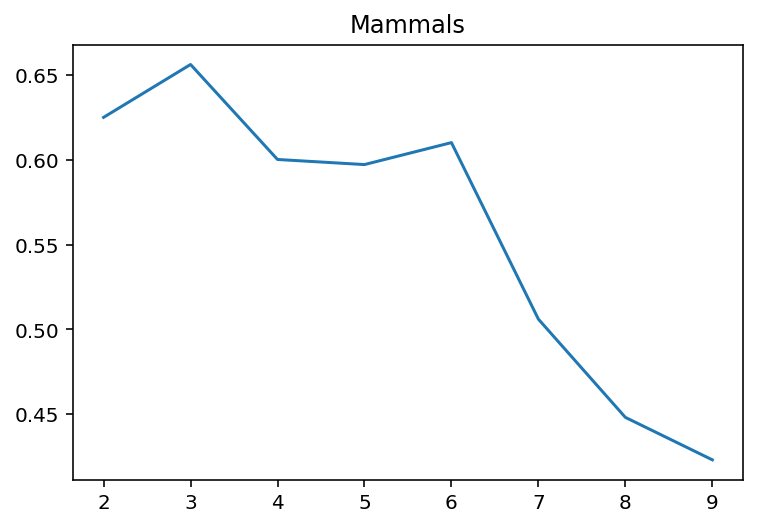

In [68]:
# Utilizaremos el métodoe de la silueta

# ¿Por qué se alimenta con blobs?
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(animales_data, 'Mammals')

En esta ocasión se puede apreciar que el número óptimo de clústeres es 3, por lo que se puede proceder al ajuste con `KMeans`. Una vez ajustados el modelo se puede imprimir las propiedades de los diferentes clústeres.

In [69]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(animales_data)

# Imprimir las propiedades de los diferentes clústeres.
kmeans.cluster_centers_

array([[86.0625    ,  4.275     ,  4.175     ,  5.11875   ,  0.635625  ],
       [45.65      , 10.15      , 38.45      ,  0.45      ,  0.69      ],
       [69.47142857,  9.51428571, 16.28571429,  2.92857143,  1.31142857]])

In [71]:
# Ahora se pueden obtener a que clúster pertenece cada animal e imprimir los grupos por pantalla
clust = kmeans.predict(animales_data)


for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (animales["name"][clust == i])

Cluster 0
0          Horse
1      Orangutan
2         Monkey
3         Donkey
4          Hippo
5          Camel
6          Bison
7        Buffalo
8     Guinea Pig
9            Cat
10           Fox
11         Llama
12          Mule
13           Pig
14         Zebra
15         Sheep
Name: name, dtype: object
Cluster 1
23       Seal
24    Dolphin
Name: name, dtype: object
Cluster 2
16         Dog
17    Elephant
18      Rabbit
19         Rat
20        Deer
21    Reindeer
22       Whale
Name: name, dtype: object
